<a href="https://colab.research.google.com/github/sduranaltayo/fem.stem.edu/blob/main/reg_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

from google.colab import drive
drive.mount('/content/drive')


# Define the full path to the file
%cd '/content/drive/MyDrive/TFM/stem_data/'

Mounted at /content/drive
/content/drive/MyDrive/TFM/stem_data


In [ ]:
# Read excel file
df=pd.read_excel('output.xlsx')

# Preprocessing

In [ ]:
# Visualize data
df.head()

,Country_Year,Year,Country,fem_stem_edu,fem_sci_eng,empl_hts,rd_edu,rd_buss,rd_all,fem_res,...,edu,fem_edu,fem_youth_unemp,rd_exp_source_buss,rd_exp_source_gov,rd_exp_source_edu,gap_empl,gap_pay,rd_gov,rd_ong
0,European Union - 27 countries (from 2020)_2015,2015,European Union - 27 countries (from 2020),33.2,8.1,2.8,41.33,20.22,32.46,29.02,...,36.5,41.8,22.1,56.86,31.56,0.985,11.1,15.5,42.66,48.84
1,Belgium_2015,2015,Belgium,26.6,5.6,2.8,41.59,27.15,34.12,NaN,...,43.1,49.2,20.5,58.60,22.51,1.990,8.3,6.4,37.21,49.15
2,Bulgaria_2015,2015,Bulgaria,37.5,9.4,3.4,51.71,37.54,47.93,47.89,...,31.8,39.6,26.7,35.58,20.35,0.080,6.3,15.5,55.67,46.26
3,Czechia_2015,2015,Czechia,34.5,5.3,3.7,35.17,12.81,26.94,23.43,...,31.0,38.1,14.4,34.53,32.21,0.710,16.6,22.5,38.84,45.73
4,Denmark_2015,2015,Denmark,32.2,8.4,4.1,42.03,24.47,33.84,31.87,...,43.0,52.0,11.1,59.11,30.20,NaN,7.8,15.1,49.67,62.55


In [ ]:
#See column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_Year        288 non-null    object 
 1   Year                288 non-null    int64  
 2   Country             288 non-null    object 
 3   fem_stem_edu        288 non-null    float64
 4   fem_sci_eng         280 non-null    float64
 5   empl_hts            280 non-null    float64
 6   rd_edu              280 non-null    float64
 7   rd_buss             280 non-null    float64
 8   rd_all              280 non-null    float64
 9   fem_res             224 non-null    float64
 10  fem_ict             280 non-null    float64
 11  real_gdp_pc         280 non-null    float64
 12  fem_lead            272 non-null    float64
 13  fem_seats           280 non-null    float64
 14  rd_exp              280 non-null    float64
 15  edu                 280 non-null    float64
 16  fem_edu 

In [ ]:
# Show null values per indicator
df.isna().sum()

Country_Year            0
Year                    0
Country                 0
fem_stem_edu            0
fem_sci_eng             8
empl_hts                8
rd_edu                  8
rd_buss                 8
rd_all                  8
fem_res                64
fem_ict                 8
real_gdp_pc             8
fem_lead               16
fem_seats               8
rd_exp                  8
edu                     8
fem_edu                 8
fem_youth_unemp        16
rd_exp_source_buss      8
rd_exp_source_gov       8
rd_exp_source_edu      24
gap_empl               16
gap_pay                40
rd_gov                  8
rd_ong                120
dtype: int64

In [ ]:
# Set the first column (Country_Year) as index
df.set_index('Country_Year', inplace=True)

In [ ]:
# Check which countries contain null values, to decide if we want to delete them for our analysis
for column in df.columns:
    if df[column].isna().sum()>0:
      missing_values = df[df[column].isna()]
      print(f"Rows where column {column} has NaN values:")
      print(missing_values[column])
      print()

Rows where column fem_sci_eng has NaN values:
Country_Year
Liechtenstein_2015   NaN
Liechtenstein_2016   NaN
Liechtenstein_2017   NaN
Liechtenstein_2018   NaN
Liechtenstein_2019   NaN
Liechtenstein_2020   NaN
Liechtenstein_2021   NaN
Liechtenstein_2022   NaN
Name: fem_sci_eng, dtype: float64

Rows where column empl_hts has NaN values:
Country_Year
Liechtenstein_2015   NaN
Liechtenstein_2016   NaN
Liechtenstein_2017   NaN
Liechtenstein_2018   NaN
Liechtenstein_2019   NaN
Liechtenstein_2020   NaN
Liechtenstein_2021   NaN
Liechtenstein_2022   NaN
Name: empl_hts, dtype: float64

Rows where column rd_edu has NaN values:
Country_Year
Liechtenstein_2015   NaN
Liechtenstein_2016   NaN
Liechtenstein_2017   NaN
Liechtenstein_2018   NaN
Liechtenstein_2019   NaN
Liechtenstein_2020   NaN
Liechtenstein_2021   NaN
Liechtenstein_2022   NaN
Name: rd_edu, dtype: float64

Rows where column rd_buss has NaN values:
Country_Year
Liechtenstein_2015   NaN
Liechtenstein_2016   NaN
Liechtenstein_2017   NaN
Liec

In [ ]:
# We delete two of our indicators: fem_res and rd_ong, since they contain a lot of NaNs.
# We'd rather delete these two variables than exclude countries from our dataset.
df.drop(columns= ['fem_res','rd_ong'], inplace=True)

In [ ]:
# Delete Liechtenstein (most variables do not cotain data for this country)
df = df[df['Country'] != 'Liechtenstein']

In [ ]:
# We also delete these countries (there are nulls included in some of the variables)
countries_to_drop= ['Switzerland','United Kingdom','Greece', 'North Macedonia', 'Serbia', 'Türkiye']

In [ ]:
for country in countries_to_drop:
    df = df[df['Country'] != country]

In [ ]:
# Round all the coulumns to 2 decimals to be consistent
for column in df.columns[3:]:
  df[column] = df[column].round(2)

In [ ]:
# Germany and Denmark contain NaNs for the variable "rd_exp_source_edu". If we check the data, we see that they should be 0 (there is some data available
# for some years and it is 0)
df.rd_exp_source_edu.replace(np.nan,0,inplace=True)

In [ ]:
df.isna().sum()

Year                  0
Country               0
fem_stem_edu          0
fem_sci_eng           0
empl_hts              0
rd_edu                0
rd_buss               0
rd_all                0
fem_ict               0
real_gdp_pc           0
fem_lead              0
fem_seats             0
rd_exp                0
edu                   0
fem_edu               0
fem_youth_unemp       0
rd_exp_source_buss    0
rd_exp_source_gov     0
rd_exp_source_edu     0
gap_empl              0
gap_pay               0
rd_gov                0
dtype: int64

# Correlation Matrix

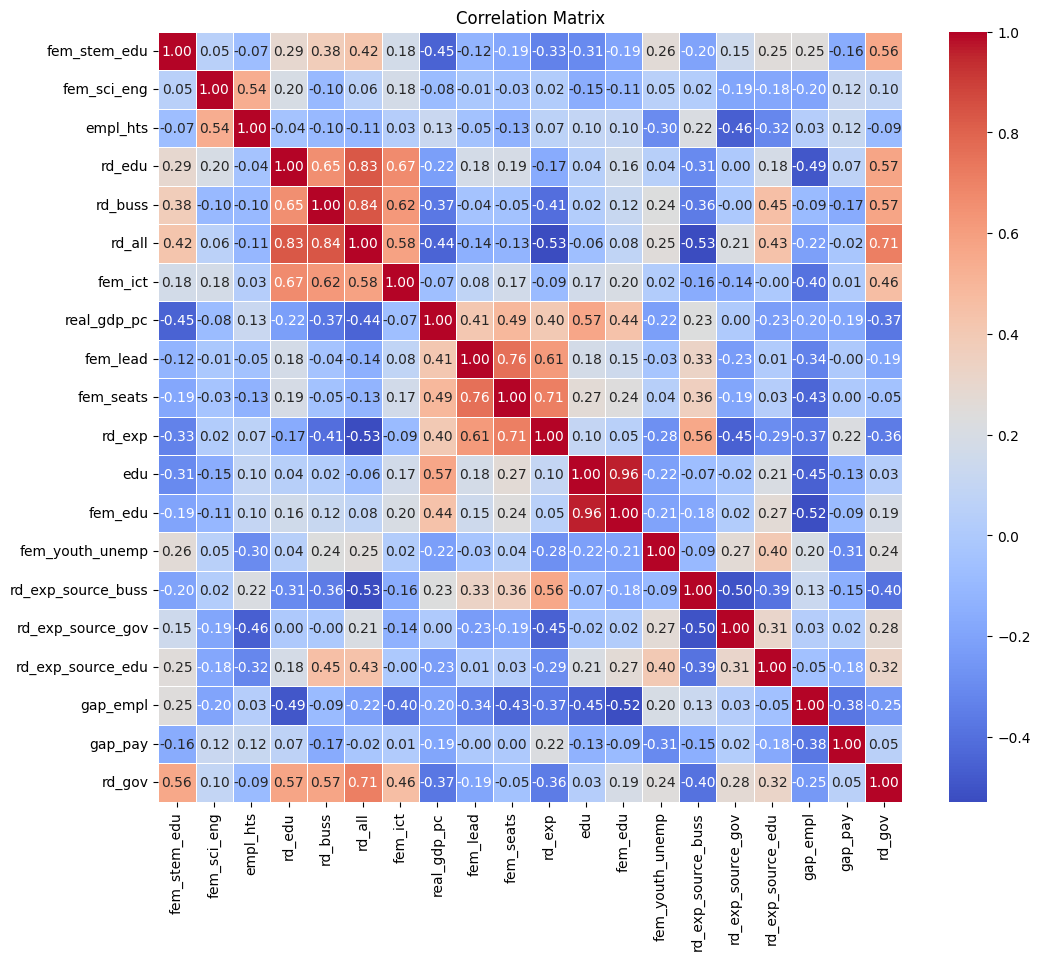

In [ ]:
#Check correlation between variables
# Select the columns you want to include in the correlation matrix
selected_columns = ['fem_stem_edu', 'fem_sci_eng', 'empl_hts', 'rd_edu', 'rd_buss', 'rd_all',
                    'fem_ict', 'real_gdp_pc', 'fem_lead', 'fem_seats', 'rd_exp', 'edu', 'fem_edu',
                    'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov', 'rd_exp_source_edu', 'gap_empl', 'gap_pay', 'rd_gov']

# Creating a new DataFrame with only the selected columns
selected_df = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



#Plot fem_stem_edu vs the other variables

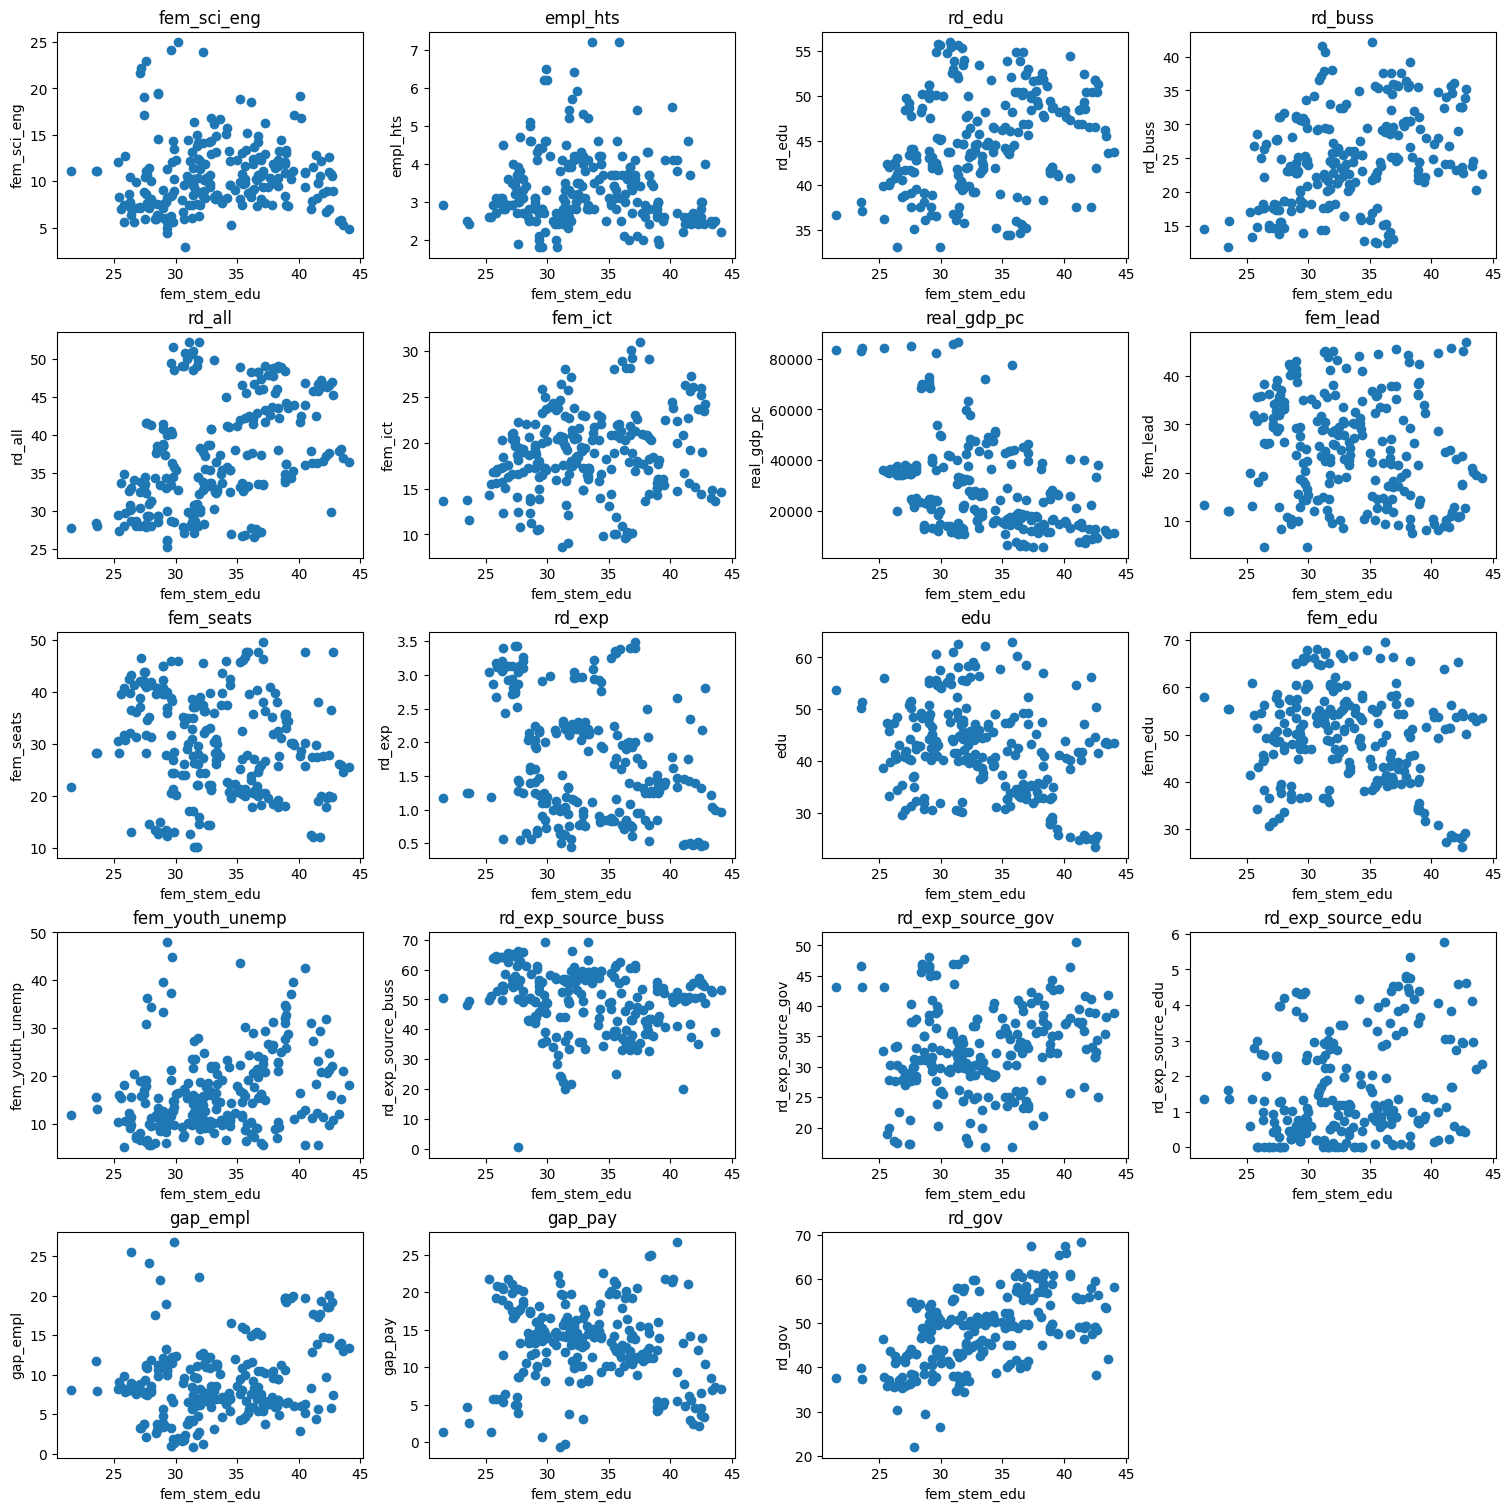

In [ ]:
df1 = df.reset_index()

# List of variables to plot against 'fem_stem_edu'
variables = ['fem_sci_eng', 'empl_hts', 'rd_edu', 'rd_buss', 'rd_all', 'fem_ict', 'real_gdp_pc', 'fem_lead',
             'fem_seats', 'rd_exp', 'edu', 'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov',
             'rd_exp_source_edu', 'gap_empl', 'gap_pay', 'rd_gov']

# Number of plots
num_vars = len(variables)
num_cols = 4  # Number of columns in the grid
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a grid of scatter plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable against 'fem_stem_edu'
for i, column in enumerate(variables):
    ax = axes[i]
    ax.scatter(df1['fem_stem_edu'], df1[column])
    ax.set_title(column)
    ax.set_xlabel('fem_stem_edu')
    ax.set_ylabel(column)

# Remove any empty subplots
for j in range(num_vars, len(axes)):
    fig.delaxes(axes[j])

plt.show()


# Assesing Impact of Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables, excluding rd_all
variables = ['fem_sci_eng', 'empl_hts', 'rd_edu', 'rd_buss', 'rd_all', 'fem_ict', 'real_gdp_pc', 'fem_lead',
             'fem_seats', 'rd_exp', 'edu', 'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov',
             'rd_exp_source_edu', 'gap_empl', 'gap_pay', 'rd_gov']

# Prepare the independent variables and dependent variable
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Linear Regression with ['fem_sci_eng', 'empl_hts', 'rd_edu', 'rd_buss', 'rd_all', 'fem_ict', 'real_gdp_pc', 'fem_lead', 'fem_seats', 'rd_exp', 'edu', 'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov', 'rd_exp_source_edu', 'gap_empl', 'gap_pay', 'rd_gov']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     17.11
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           4.76e-33
Time:                        12:22:52   Log-Likelihood:                -589.91
No. Observations:                 232   AIC:                             1220.
Df Residuals:                     212   BIC:                             1289.
Df Model:                          19                                         
Covariance

# Multiple Linear Regression Model: OLS

## Regression with all variables

In [ ]:
variables= ['fem_sci_eng', 'empl_hts', 'rd_edu', 'rd_buss', 'rd_all', 'fem_ict', 'real_gdp_pc', 'fem_lead',
            'fem_seats', 'rd_exp', 'edu', 'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov',
            'rd_exp_source_edu', 'gap_empl', 'gap_pay', 'rd_gov' ]

# Create a copy of the dataset
df1= df.copy()

# reset index so that Column_Year is a column again
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Standardize independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=variables)

# Add a constant
X_scaled = sm.add_constant(X_scaled)

# Linear Regression Model
modelo = sm.OLS(y, X_scaled).fit()

# Print results
print(f'\nLinear Regression with {variables}:')
print(modelo.summary())


Linear Regression with ['fem_sci_eng', 'empl_hts', 'rd_edu', 'rd_buss', 'rd_all', 'fem_ict', 'real_gdp_pc', 'fem_lead', 'fem_seats', 'rd_exp', 'edu', 'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov', 'rd_exp_source_edu', 'gap_empl', 'gap_pay', 'rd_gov']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     17.11
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           4.76e-33
Time:                        12:22:52   Log-Likelihood:                -589.91
No. Observations:                 232   AIC:                             1220.
Df Residuals:                     212   BIC:                             1289.
Df Model:                          19                                         
Covariance

## Regression with each explanatory variable

In [ ]:
#List with variables for regression

variables= ['fem_sci_eng', 'empl_hts', 'rd_edu', 'rd_buss', 'rd_all', 'fem_ict', 'rd_gov']

for variable in variables:

  df1= df.copy()
  df1 = df1.reset_index()

  # Defining the dependent and independent variables
  X = df1[variable]
  y = df1['fem_stem_edu']

  X= sm.add_constant(X)

  # Linear regression model
  model = sm.OLS(y, X).fit()

  # Print results
  print(f'\nLinear Regression with {variable}:')
  print(model.summary())


Linear Regression with fem_sci_eng:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4770
Date:                Fri, 21 Jun 2024   Prob (F-statistic):              0.490
Time:                        12:22:52   Log-Likelihood:                -697.50
No. Observations:                 232   AIC:                             1399.
Df Residuals:                     230   BIC:                             1406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        

A large F-statistic value proves that the regression model is effective in its explanation of the variation in the dependent variable and vice versa. On the contrary, an F-statistic of 0 indicates that the independent variable does not explain the variation in the dependent variable.

#Regression with each control variable

In [ ]:
#List with variables for regression
variables= ['real_gdp_pc', 'fem_lead', 'fem_seats', 'rd_exp', 'edu', 'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov', 'rd_exp_source_edu', 'gap_empl', 'gap_pay' ]

for variable in variables:
  df1= df.copy()
  df1 = df1.reset_index()

  # Defining the dependent and independent variables
  X = df1[variable]
  y = df1['fem_stem_edu']

  X= sm.add_constant(X)

  # Linear regression model
  model = sm.OLS(y, X).fit()

  # Print results
  print(f'\nLinear Regression with {variable}:')
  print(model.summary())


Linear Regression with real_gdp_pc:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     58.64
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           5.22e-13
Time:                        12:22:53   Log-Likelihood:                -671.40
No. Observations:                 232   AIC:                             1347.
Df Residuals:                     230   BIC:                             1354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        

# MLR models

###Regression model (1):
* Explanatory variables: rd_all, fem_ict, dem_sci_eng

In [ ]:

variables = ['rd_all', 'fem_ict', 'fem_sci_eng']

#Create copy of the dataframe
df1 = df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())



Linear Regression with ['rd_all', 'fem_ict', 'fem_sci_eng']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     17.85
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.94e-10
Time:                        12:22:53   Log-Likelihood:                -673.27
No. Observations:                 232   AIC:                             1355.
Df Residuals:                     228   BIC:                             1368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

###Regression model (2):
* Explanatory variables: rd_all, fem_ict, dem_sci_eng
* Control variables: real_gdp_pc, fem_lead, fem_seats, rd_exp, edu, fem_edu, fem_youth_unemp, rd_exp_source_buss, rd_exp_source_gov, rd_exp_source_edu, gap_empl, gap_pay

In [ ]:
import statsmodels.api as sm

variables= ['rd_all', 'fem_ict', 'fem_sci_eng', 'real_gdp_pc', 'fem_lead', 'fem_seats', 'rd_exp', 'edu',
            'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov', 'rd_exp_source_edu', 'gap_empl', 'gap_pay' ]

#Create a copy of the dataframe
df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Scale independent variables (they are all % except for real_gdp_pc)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=variables)

# Add a constant
X_scaled = sm.add_constant(X_scaled)

# Linear regression model
model = sm.OLS(y, X_scaled).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())



Linear Regression with ['rd_all', 'fem_ict', 'fem_sci_eng', 'real_gdp_pc', 'fem_lead', 'fem_seats', 'rd_exp', 'edu', 'fem_edu', 'fem_youth_unemp', 'rd_exp_source_buss', 'rd_exp_source_gov', 'rd_exp_source_edu', 'gap_empl', 'gap_pay']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     11.87
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           4.25e-21
Time:                        12:22:53   Log-Likelihood:                -627.99
No. Observations:                 232   AIC:                             1288.
Df Residuals:                     216   BIC:                             1343.
Df Model:                          15                                         
Covariance Type:            nonrobust                

###Regression model (3):
* Explanatory variables: rd_all
* Control variables: rd_exp

In [ ]:
variables= ['rd_all', 'rd_exp']

df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

X= sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())


Linear Regression with ['rd_all', 'rd_exp']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     28.04
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.29e-11
Time:                        12:22:53   Log-Likelihood:                -672.33
No. Observations:                 232   AIC:                             1351.
Df Residuals:                     229   BIC:                             1361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

###Regression model (4):
* Explanatory variable: rd_all
* Control variables: fem_edu

In [ ]:
variables= ['rd_all', 'fem_edu']

df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']


# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())


Linear Regression with ['rd_all', 'fem_edu']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     34.86
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           6.08e-14
Time:                        12:22:53   Log-Likelihood:                -666.91
No. Observations:                 232   AIC:                             1340.
Df Residuals:                     229   BIC:                             1350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

### Final regression model:
* Explanatory variables: rd_all
* Control variables: gap_empl, fem_lead, rd_exp_source_edu

**# Eliminar**

In [ ]:
variables= ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp_source_edu']

df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())


Linear Regression with ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp_source_edu']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     25.23
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           2.67e-17
Time:                        12:22:53   Log-Likelihood:                -655.08
No. Observations:                 232   AIC:                             1320.
Df Residuals:                     227   BIC:                             1337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [ ]:
variables= ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp_source_gov']

df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())


Linear Regression with ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp_source_gov']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     25.31
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           2.39e-17
Time:                        12:22:53   Log-Likelihood:                -654.96
No. Observations:                 232   AIC:                             1320.
Df Residuals:                     227   BIC:                             1337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

## Adding more Control Variables

### Final Regression model by Female Role Model:
* Explanatory variables: rd_all
* Control variables: gap_empl, fem_lead, rd_exp, rd_exp_source_gov, gap_pay

In [ ]:
variables= ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay', ]

df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())


Linear Regression with ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     17.48
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.37e-16
Time:                        12:22:53   Log-Likelihood:                -653.35
No. Observations:                 232   AIC:                             1321.
Df Residuals:                     225   BIC:                             1345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [ ]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
             feature         VIF
0              const  201.507492
1             rd_all    2.068672
2           gap_empl    1.834058
3           fem_lead    1.859457
4             rd_exp    3.870284
5  rd_exp_source_gov    1.349419
6            gap_pay    1.269347


# Impact of Female Role Models by Sector Regression


### Regression (1)
* Explanatory variables: rd_gov, rd_edu, rd_buss. Excluding base category: rd_ong
* Control variables: none

In [ ]:
variables= ['rd_gov', 'rd_buss', 'rd_edu']

df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())


Linear Regression with ['rd_gov', 'rd_buss', 'rd_edu']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     36.51
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           2.62e-19
Time:                        09:33:30   Log-Likelihood:                -652.23
No. Observations:                 232   AIC:                             1312.
Df Residuals:                     228   BIC:                             1326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### Final Regression model by Female Role Model Sector:
* Explanatory variables: rd_gov, rd_edu, rd_buss. Excluding base category: rd_ong
* Control variables: gap_empl, fem_lead, rd_exp, rd_exp_source_gov, gap_pay

In [ ]:
variables= ['rd_gov', 'rd_edu', 'rd_buss', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay', ]

df1= df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())


Linear Regression with ['rd_gov', 'rd_edu', 'rd_buss', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     29.90
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.77e-31
Time:                        09:33:30   Log-Likelihood:                -613.20
No. Observations:                 232   AIC:                             1244.
Df Residuals:                     223   BIC:                             1275.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables, excluding rd_all
variables = ['rd_gov', 'rd_edu', 'rd_buss', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']

# Prepare the independent variables and dependent variable
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create and train the linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Linear Regression with ['rd_gov', 'rd_edu', 'rd_buss', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     29.90
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.77e-31
Time:                        09:33:30   Log-Likelihood:                -613.20
No. Observations:                 232   AIC:                             1244.
Df Residuals:                     223   BIC:                             1275.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-

As VIF is between 1 but below 5 we have moderate multicollinearity.


In [ ]:

df1 = df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables, excluding rd_all
variables = ['rd_gov', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']

# Prepare the independent variables and dependent variable
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Linear Regression with ['rd_gov', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     37.15
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           3.77e-31
Time:                        09:33:30   Log-Likelihood:                -617.88
No. Observations:                 232   AIC:                             1250.
Df Residuals:                     225   BIC:                             1274.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [ ]:
df1 = df.copy()
df1 = df1.reset_index()

# Defining the dependent and independent variables, excluding rd_all
variables = ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']

# Prepare the independent variables and dependent variable
X = df1[variables]
y = df1['fem_stem_edu']

# Add a constant
X = sm.add_constant(X)

# Linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of results
print(f'\nLinear Regression with {variables}:')
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Linear Regression with ['rd_all', 'gap_empl', 'fem_lead', 'rd_exp', 'rd_exp_source_gov', 'gap_pay']:
                            OLS Regression Results                            
Dep. Variable:           fem_stem_edu   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     17.48
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.37e-16
Time:                        09:33:30   Log-Likelihood:                -653.35
No. Observations:                 232   AIC:                             1321.
Df Residuals:                     225   BIC:                             1345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------

#Countries by income

In [ ]:
pd.cut(df['real_gdp_pc'], 3)

Country_Year
European Union - 27 countries (from 2020)_2015      (5619.16, 32646.667]
Belgium_2015                                      (32646.667, 59593.333]
Bulgaria_2015                                       (5619.16, 32646.667]
Czechia_2015                                        (5619.16, 32646.667]
Denmark_2015                                      (32646.667, 59593.333]
                                                           ...          
Slovakia_2022                                       (5619.16, 32646.667]
Finland_2022                                      (32646.667, 59593.333]
Sweden_2022                                       (32646.667, 59593.333]
Iceland_2022                                      (32646.667, 59593.333]
Norway_2022                                         (59593.333, 86540.0]
Name: real_gdp_pc, Length: 232, dtype: category
Categories (3, interval[float64, right]): [(5619.16, 32646.667] < (32646.667, 59593.333] <
                                           (5

In [ ]:
# Calculate the 25th, 50th (median), and 75th percentiles
percentiles = np.percentile(df['real_gdp_pc'], [25, 50, 75])

print("25th Percentile:", percentiles[0])
print("50th Percentile (Median):", percentiles[1])
print("75th Percentile:", percentiles[2])

25th Percentile: 14730.0
50th Percentile (Median): 24900.0
75th Percentile: 37267.5
